In [11]:
import re

import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

loading data

In [2]:
orfan1 = pd.read_csv("./orfan1pr.csv", header=None, index_col=0).T["Conservation"].iloc[:-1].astype(float).values  # drop last value
orfan2 = pd.read_csv("./orfan2pr.csv", header=None, index_col=0).T["Conservation"].iloc[:-1].astype(float).values  # drop last value
orfan3 = pd.read_csv("./orfan3pr.csv", header=None, index_col=0).T["Conservation"].iloc[:-1].astype(float).values  # drop last value
co1 = pd.read_csv("./co1.csv", header=None, index_col=0).T["Conservation"].iloc[:-1].astype(float).values  # drop last value
nad6 = pd.read_csv("./nad6.csv", header=None, index_col=0).T["Conservation"].iloc[:-1].astype(float).values  # drop last value

In [3]:
hid1 = pd.read_csv("./orfan1pr.csv", header=None, index_col=0).T["Conservation"].iloc[:-1].astype(float).values  # drop last value

In [4]:
tmds = pd.read_csv("./domain.csv")
tmds

,orfan,organism,start,end,domen
0,1,wsbs,5,27,TRANSMEMBRANE
1,1,hoplura,6,28,TRANSMEMBRANE
2,1,websteri,6,28,TRANSMEMBRANE
3,1,brevipalpa,12,36,TRANSMEMBRANE
4,1,bocardiela,13,39,TRANSMEMBRANE
5,1,wsbs,40,57,TRANSMEMBRANE
6,1,websteri,41,58,TRANSMEMBRANE
7,1,hoplura,41,67,TRANSMEMBRANE
8,1,brevipalpa,42,75,TRANSMEMBRANE
9,1,bocardiela,45,76,TRANSMEMBRANE


In [16]:
SPECIES_DICT = {"wsbs": "WSBS $Polydora$",
                "hoplura": "$Polydora\ hoplura$",
                "websteri": "$Polydora\ websteri$",
                "brevipalpa": "$Polydora\ brevipalpa$",
                "bocardiela": "$Bocardiela\ hamata$"}

INVERSE_SPECIES_DICT = {v: k for k, v in SPECIES_DICT.items()}

tmds["species"] = tmds["organism"].map(SPECIES_DICT)
tmds

,orfan,organism,start,end,domen,species
0,1,wsbs,5,27,TRANSMEMBRANE,WSBS $Polydora$
1,1,hoplura,6,28,TRANSMEMBRANE,$Polydora\ hoplura$
2,1,websteri,6,28,TRANSMEMBRANE,$Polydora\ websteri$
3,1,brevipalpa,12,36,TRANSMEMBRANE,$Polydora\ brevipalpa$
4,1,bocardiela,13,39,TRANSMEMBRANE,$Bocardiela\ hamata$
5,1,wsbs,40,57,TRANSMEMBRANE,WSBS $Polydora$
6,1,websteri,41,58,TRANSMEMBRANE,$Polydora\ websteri$
7,1,hoplura,41,67,TRANSMEMBRANE,$Polydora\ hoplura$
8,1,brevipalpa,42,75,TRANSMEMBRANE,$Polydora\ brevipalpa$
9,1,bocardiela,45,76,TRANSMEMBRANE,$Bocardiela\ hamata$


In [6]:
titles = {"ORFan1": orfan1,
          "ORFan2": orfan2,
          "ORFan3": orfan3,
          "NAD6": nad6,
          "CO1": co1}

parsing files of hydrophobicity profile 

In [9]:
def load_weird(path):
    with open(path, "rt") as file:
        dat = dict()
        for line in file:
            pos, score = re.match(r"Position:\s+(\d+)\s+Score:\s*([^\s]+)\s*", line).group(1, 2)
            pos = int(pos)
            score = float(score)
            dat[pos] = score
    return pd.Series(dat)

In [15]:
supdata = {
    1: {
        "wsbs": load_weird("./1wsbsparse.txt"),
        "hoplura": load_weird("./1hoppars.txt"),
        "websteri": load_weird("./1webpars.txt"),
        "brevipalpa": load_weird("./1polbrepars.txt"),
        "bocardiela": load_weird("./1bocardpars.txt")
    },
    2: {
        "wsbs": load_weird("./2parswsbs.txt"),
        "hoplura": load_weird("./2parshop.txt"),
        "websteri": load_weird("./2parspolweb.txt"),
        "brevipalpa": load_weird("./2brevpars.txt"),
        "bocardiela": load_weird("./2bocardpars.txt")
    },
}

In [7]:
STEP = 1
COLORS = ["#819F00", "#BF9B30", "#A62F00", "#25567B", "#710067"]

color_map = mpl.colors.LinearSegmentedColormap(
    "my_map",
    {
        "red": [(0, 1.0, 1.0),
                (1.0, .5, .5)],
        "green": [(0, 0.5, 0.5),
                  (1.0, 0, 0)],
        "blue": [(0, 0.50, 0.5),
                 (1.0, 0, 0)]
    }
)
 

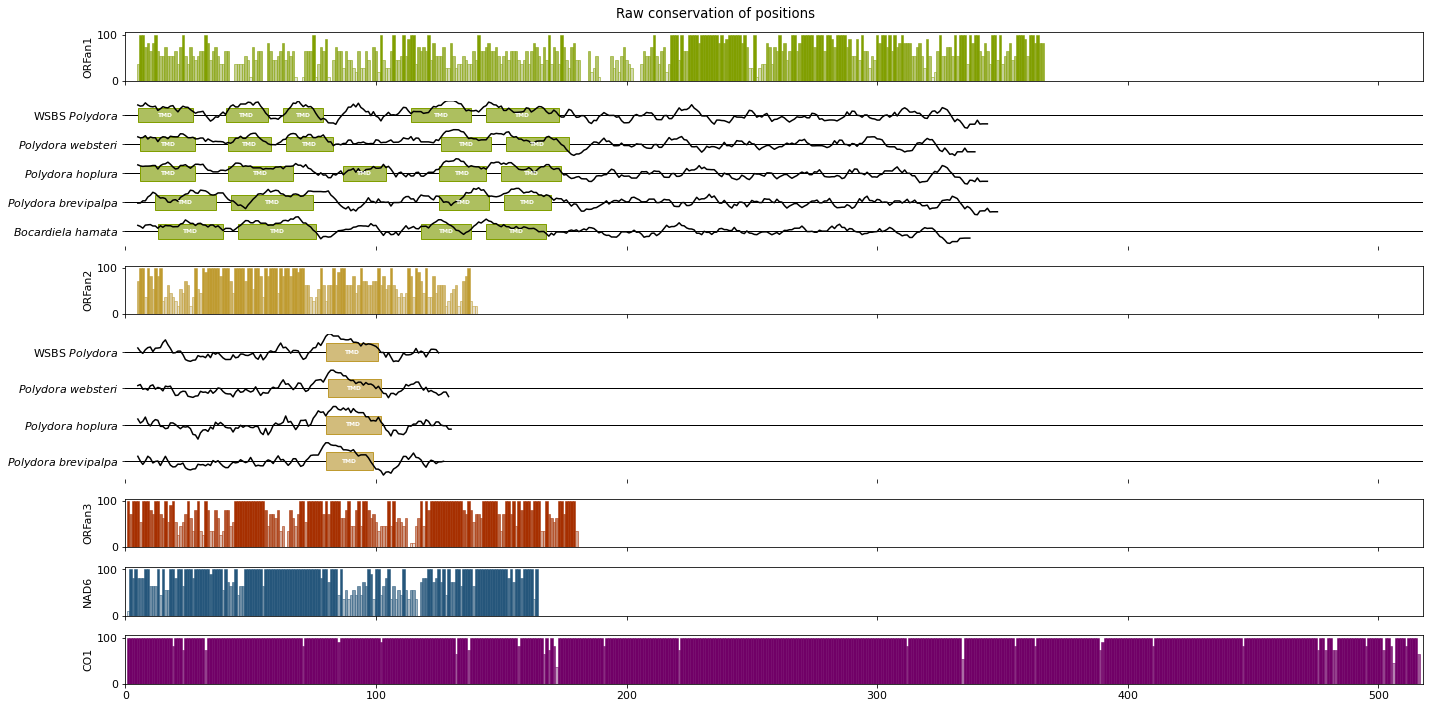

In [23]:
fig, axes = plt.subplots(7, 1, figsize=(20, len(titles) * 2), sharex=True, gridspec_kw=dict(height_ratios=[1, 3, 1, 3, 1, 1, 1]))
axes_plots = axes.ravel()[[0, 2, 4, 5, 6]]
axes_domains = axes.ravel()[[1, 3]]
plt.rcParams['font.size'] = '11'
for i, ((title, data), ax) in enumerate(zip(titles.items(), axes_plots), 0):
    limit = data.max()
    agg = data.copy()
    for roll_step in range(1, STEP):
        agg += np.roll(data, roll_step)
    agg = agg[STEP::STEP] / (limit * STEP) * 100
    agg = np.array(agg)
    x_coords = np.arange(1, data.shape[0] - STEP + 1, STEP)
    data_normalizer = mpl.colors.Normalize()
    color_map = mpl.colors.LinearSegmentedColormap.from_list("my_map", ["#eeeeee", COLORS[i]])
    color_agg = color_map(data_normalizer(agg))
    ax.bar(x_coords, agg, width=STEP, align="center", color=color_agg, linewidth=0.5, edgecolor=COLORS[i])

           #color=COLORS[i])
    ax.set_xlim(0, x_coords[-1])
    ax.set_ylabel(title)

# Domain architecture 1
rect_h = 0.5
rect_text = "TMD"
for i, ax in enumerate(axes_domains, 1):
    data_domain = tmds[tmds["orfan"] == i]
    uniq_sp = data_domain["species"].nunique()
    rectangles = list()
    species_names = list()
    y_ticks = np.linspace(1, uniq_sp, uniq_sp)
    colormap = mpl.colors.LinearSegmentedColormap.from_list("my_map", ["#eeeeee", COLORS[i - 1]])
    color_edge = COLORS[i - 1]
    color_face = colormap(0.6)
    #print(color_edge, color_face)
    for (species, subdata), y_coord in zip(data_domain.groupby("species"), y_ticks):
        species_names.append(species)
        for _, row in subdata.iterrows():
            # row contains info about a rectangle
            rect_x = row["end"]
            rect_y = y_coord - rect_h / 2
            rect_w = row["start"] - row["end"]
            rect = mpl.patches.Rectangle((rect_x, rect_y), rect_w, rect_h,
                                         facecolor=color_face, edgecolor=color_edge)
            rectangles.append(rect)
    
    for species, y_coord in zip(species_names, y_ticks):
        code = INVERSE_SPECIES_DICT[species]
        data = supdata[i][code]
        # -1 - 1 scaling, preserving 0:
        data = data / data.abs().max()
        # 0 - 1 scaling:
        #data = (data - data.min()) / (data.max() - data.min())
        data /= 2
        data += y_coord
        ax.plot(data.index, data.values, color="k")
    
    for y in y_ticks:
        ax.axhline(y, color="k", lw=1, zorder=-10)
    
    for rect in rectangles:
        ax.add_artist(rect)
        rect_x, rect_y = rect.get_xy()
        text_x = rect_x + rect.get_width() / 2.0
        text_y = rect_y + rect.get_height() / 2.0
        ax.annotate(rect_text, (text_x, text_y), color='w', weight='bold',
                    fontsize=6, ha='center', va='center')
    
    ax.set_ylim(1 - rect_h, uniq_sp + rect_h)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    #ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks(y_ticks, species_names)
    
        



plt.suptitle(f"Conservation of positions, averaged in window of {STEP}" if STEP != 1 else f"Raw conservation of positions")
plt.tight_layout()
plt.savefig(f"all_step={STEP}.svg")